<a href="https://colab.research.google.com/github/PeaceUdoka/No_show_project/blob/main/Investigate_a_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset shows information from 100thousand medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. It also shows other characteristics about the patients such as: 

<ul>
    <li><b>PatientId</b></li>
    <li><b>AppointmentID</b></li>
    <li><b> Gender</b></li>
    <li><b>Age</b></li>
    <li><b>ScheduledDay</b> tells us on what day the patient set up their appointment.</li>
    <li><b>Neighborhood</b> indicates the location of the hospital.</li>
    <li><b>Scholarship</b> indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li>
    <li><b>Hipertension,Diabetes,Alcoholism,Handcap</b> tells us whether or not the patient is suffering from hypertension, diabetes, alcoholism or is handicapped. 0 means "No" and 1 means "Yes".</li>
    <li><b>SMS_received</b> number of messages sent to he patient.</li>
    <li><b>No-show</b> says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.</li>
    </ul>

### Question for Analysis

Through the course of this report, i'll be answering the following questions:
1. Which gender is more likely to show up for appointments?
2. What are the top five locations where patients are more likely to show up for their appointments?
3. Is sending messages likely to affect if a patient shows up or not?
4. which category of patients who are on scholarship are more likely to miss their appointments?
 

In [ ]:
# import useful libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# set general style of plots in this report
sns.set(style = "whitegrid")

<a id='wrangling'></a>
## Data Wrangling

To analyse this dataset, it must be cleaned first to improve accuracy of analysis.
Let's see what the data looks like.


In [ ]:
# Load dataset and print out a few lines. 
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
#number of rows and columns in dataset
df.shape

(110527, 14)

We can see that the dataset is quite large with 110527 rows and 14 observations. Next, let's check the summary statistics and distritubtion of data to understand the data better.

In [ ]:
#summary statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The PatientId and AppointmentID summary statistics look wierd, don't they? That's because they shouldn't be in this summary at all. This means that they don't have the right datatypes.

There seems to be no missing data since all columns have 110527 rows.

From the age column, we can see that the average age in this dataset is 37. However, a minimum age of -1 is quite unrealistic as we can't have negative ages. Also data from patients above 100 may not be accurate and reliable.

The handicap column has a maximum of 4 which isn't consistent with the rule given for the column which says that only two values (0 and 1) is expected.

Next, let's look at the distribution.

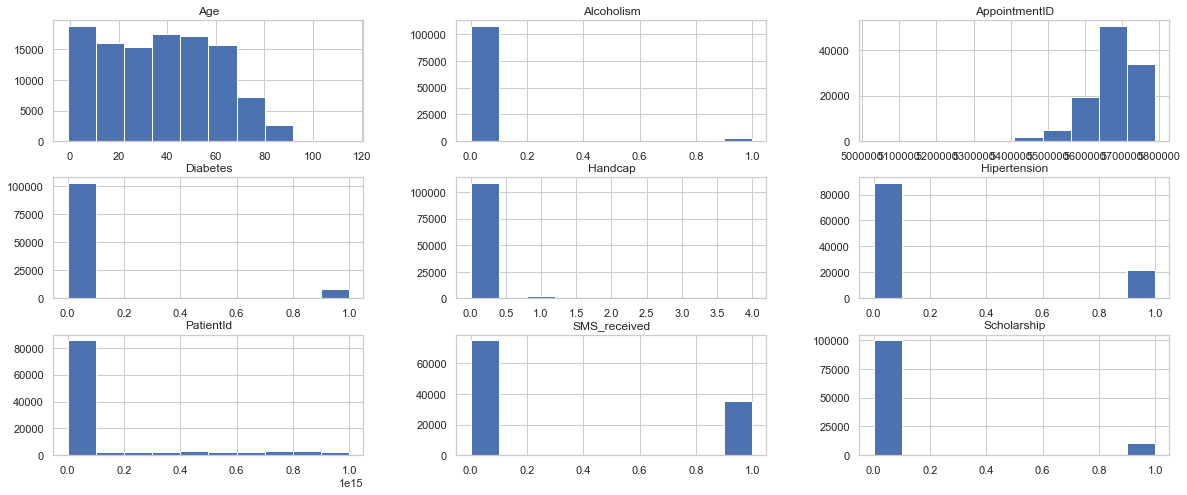

In [ ]:
#plot a histogram for entire data
df.hist(figsize=(20,8));

The plot above shows that majority of the patients are below 70 and very few above 90.

Most of the patients are not suffering from Diabetes, Alcoholism, Hypertension or handicapped.

Also, majority of them are not enrolled in Brasilian welfare program Bolsa Família.

Now that we understand the data better, let's highlight a few problems that were observed.

### Problems

1. The datatypes of all columns should be inspected and changed, where necessary.
2. The Age rows with negative and unreliable values should be inspected and removed.
3. The handicap column should be inspected and inconsistent rows removed.
4. The No-show column should be renamed to No_show to avoid errors that could occur as a result of the hyphen.


Now that we've highlighted the problems in this dataset, let's begin the cleaning operations!

## Data Cleaning

### Inspecting Datatype

In [ ]:
#get information on every column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 9.7+ MB


From the information above, the <b>PatientId and AppointmentID</b> do not have the right datatype. They should be strings since they are unique values for identification and should not be affected by statistical operations. 

However, these columns are not relevant to our analysis and so will be removed. 
The <b>AppointmentDay and ScheduledDay</b> column is also not relevant to the analysis and will be removed.

In [ ]:
#remove irrelevant columns
df.drop(["PatientId", "AppointmentID", "ScheduledDay", "AppointmentDay"], axis= 1, inplace= True)


In [ ]:
#show data to verify that the columns were indeed dropped
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Inspecting Age Column
**To remove age rows with negative values**

In [ ]:
# get rows in Age column with negative values
invalid = df[df.Age<0].index

#delete these rows
df.drop(invalid, inplace=True)

#show minimum age
df.Age.min()

0

The rows with negative Age values have been removed and the minimum age is now 0 which is more realistic. 

**To remove ages above 100**

In [ ]:
# get rows in Age column that are above 100
unreliable = df[df.Age>100].index

#delete these rows
df.drop(unreliable, inplace=True)


Ages above 100 which may contain unreliable information have been successfully removed.

### Inspecting Handicap Column

It was observed that the Handicap column contains some rows with values greater than 1. Let's get these columns.

In [ ]:
# count number of rows with Handicap values greater than 1
df[df.Handcap>1].count()["Handcap"]

199

There are 199 rows with Handicap values greater than 1. Considering the large dataset(110527 rows), these 199 rows which showed inconsistencies can be removed.

In [ ]:
# get rows with Handicap value greater than 1
incons = df[df.Handcap>1].index

# delete these rows
df.drop(incons, inplace = True)

# show maximum handicap value

df.Handcap.max()

1

The inconsistent rows have been successfully removed and the maximum value is now 1 as it should be.

There's no need checking for duplicate values as some patients might have had appointments on several days.


### Rename No-show Column

In [ ]:
df.rename(columns={"No-show":"No_show"}, inplace=True)


Hooray! The data is clean to be used.

Let's move on to analysing the data based on questions posed.

<a id='eda'></a>
## Exploratory Data Analysis


## 1. Which gender is more likely to show up for appointments?
To answer this question, we must first check the distribution of the gender in the dataset. 

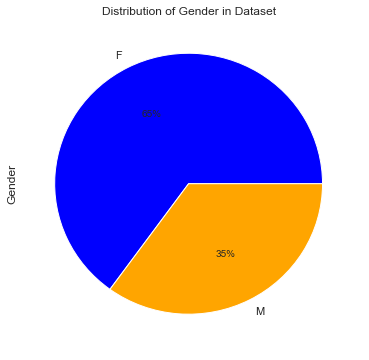

In [ ]:
#plot a pie chart showing distribution of gender
df["Gender"].value_counts().plot(kind = "pie", figsize = (6,6), colors =["blue","orange"], autopct = "%1.0f%%");
plt.title("Distribution of Gender in Dataset");

The pie chart shows that a greater percentage of the patients in the dataset are females.

To prevent bias that could occur in answering this question as a result of this huge difference, a grouped bar plot would used to compare the ratios of no-show to show for each gender.

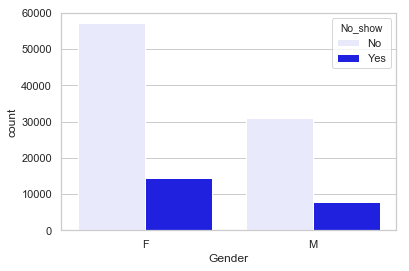

In [ ]:
# plot a grouped bar chart for gender based on no-show
#df.groupby(["No-show","Gender"])["Gender"].hist()
sns.countplot(x = "Gender", hue ="No_show", color = "blue", data = df);

>Recall that "No" means that the patieent showed up and "Yes" means that they didnt.

The bar plot shows that the ratio of females that showed up to those that didn't is higher than the ratio of males that showed up to those that didin't. 

Hence, it is safe to say that the female gender is more likely to show up for their appointment.

## 2. What are the top five locations where patients are more likely to show up for their appointments?

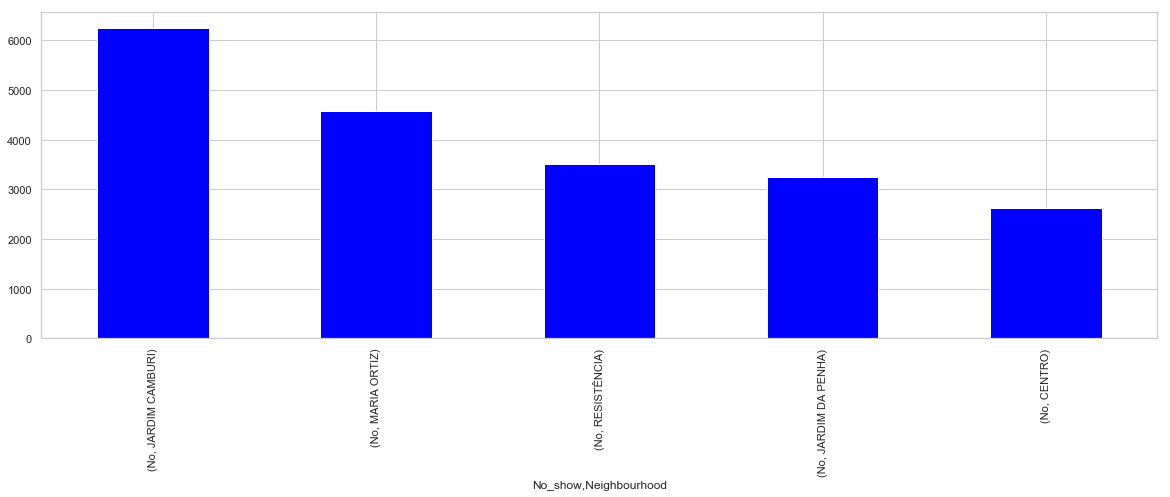

In [ ]:
df.groupby("No_show")["Neighbourhood"].value_counts().head(5).plot(kind="bar", color = "blue", figsize=(20,6));

The top five locations where patients are most likely to show up for their appountments include:
<li> Jardim Camburi </li>
<li> Maria Oritz </li>
<li> Resistencia </li>
<li> Jardim Da Penha </li>
<li> Centro </li>

## 3. Is sending messages likely to determine if a patient shows up or not?

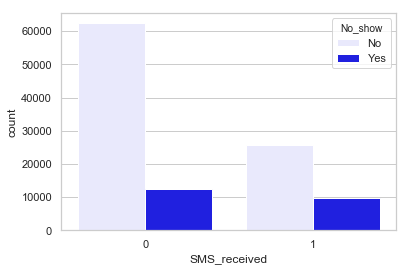

In [ ]:
# plot a grouped bar chart for SMS_received based on no-show
sns.countplot(x = "SMS_received", hue ="No_show", color = "blue", data = df);

The chart above shows that the ratio of those that showed up to those that didn't is higher when SMS wasn't sent than when an SMS was sent. This shows that sending SMS may not determine if a patient will show up or not. 

## 3. Which category of patients on scholarship are more likely to miss their appointments?
To answer this question, i'll define what  i mean by categories.

Categories of patients include those that:
- that have Hipertension,
- that have Diabetes,
- that have Alcoholism,
- that are Handcapped
  
First, we must make sure there aren't any other factors that may affect our results. Let's see the distribution of these factors...

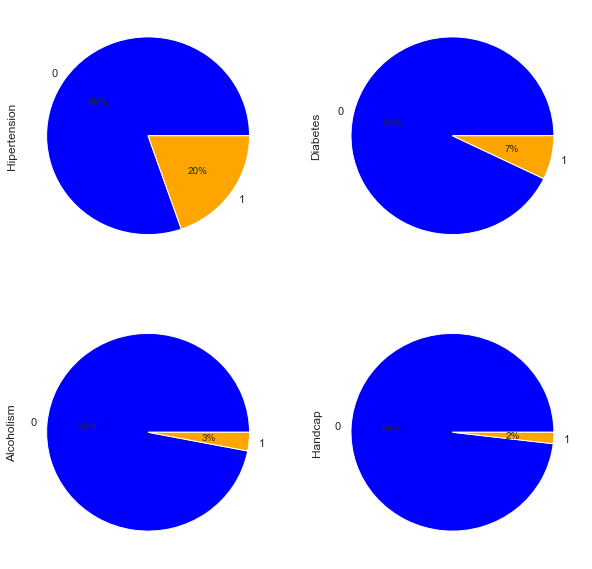

In [ ]:
# count the number of patients that have each illness

fig, axs = plt.subplots(2,2, figsize = (10,8))
df["Hipertension"].value_counts().plot(kind = "pie", figsize = (10,10), autopct = "%1.0f%%", colors =["blue","orange"], ax=axs[0,0]);
df["Diabetes"].value_counts().plot(kind = "pie", figsize = (10,10), autopct = "%1.0f%%", colors =["blue","orange"], ax=axs[0,1]);
df["Alcoholism"].value_counts().plot(kind = "pie", figsize = (10,10), autopct = "%1.0f%%", colors =["blue","orange"], ax=axs[1,0]);
df["Handcap"].value_counts().plot(kind = "pie", figsize = (10,10), autopct = "%1.0f%%", colors =["blue","orange"], ax=axs[1,1]);

From the visualisatons above, it can be seen that a small quantity of patients are suffering from an illness. To answer our question, we'll only consider this minority.

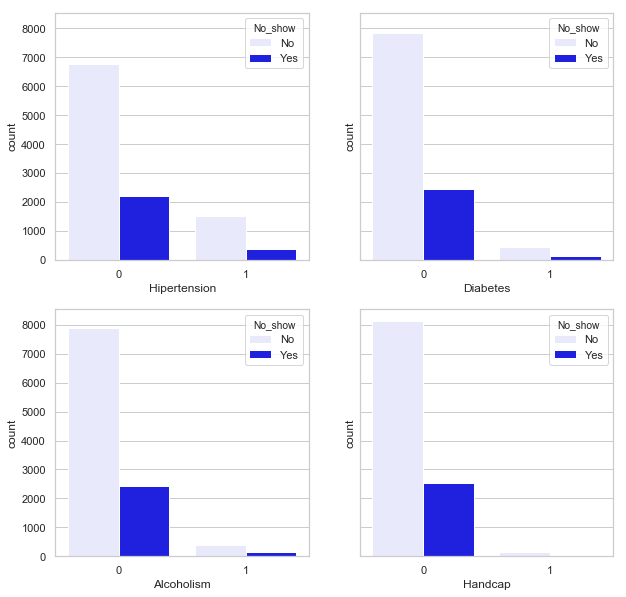

In [ ]:
fig, axs = plt.subplots(2,2, sharey = True, figsize = (10,10))

# Filter data by Scholarship to get those that are enrolled in the welfare scholarship program
filtered = df.query("Scholarship==1", inplace=True)

# then count the number of paients in each category and plot
sns.countplot(x ="Hipertension", hue = "No_show", color = "blue", data = df, ax = axs[0,0]);
sns.countplot(x = "Diabetes", hue = "No_show", color = "blue", data = df, ax = axs[0,1]);
sns.countplot(x = "Alcoholism", hue = "No_show", color = "blue", data = df, ax = axs[1,0]);
sns.countplot(x = "Handcap", hue = "No_show", color = "blue", data = df, ax = axs[1,1]);

> Recall that majority of the patients in this dataset do not suffer from any of the diseases and those that missed their appointment is represented by 1


From the visualisations above, it can be seen that among patients who have these diseases, a higher number of those that have hipertension was recorded to miss for their appointments than other diseases. 

Therefore, we can say that those hat have hipertension are more likely to show up for their appointment.

<a id='conclusions'></a>
## Conclusions

The report shows that the following patients are more likely to show up for their appointment:
- females
- those that live in those that live in Jardim Camburi, Maria Oritz, Resistencia, Jardim Da Penha, Centro

Those that suffer from Hipertension are also more likely to miss their appointment than others.

However, considering the fact that the dataset contained more of patients who showed up for their appointment, it would have been clearer to analyse factors that could contribute to a patient missing his appointment if the dataset contained only those missed their appointment.

